# ACCIDENTS' SEVERITY PREDICTION

### Description

This notebook will be used to demonstrate data analysis, building and evaluation of models as part of the IBM's Applied Data Science Capstone course.

### Import libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Data input

In [2]:
data = pd.read_csv('Data-Collisions.csv')
data.shape

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(194673, 38)

In [3]:
data.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### Selecting Relevent Features For Cleaning

In [4]:
features = ['JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','VEHCOUNT','SEVERITYCODE']
df = data[features].copy()
df

,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,VEHCOUNT,SEVERITYCODE
0,At Intersection (intersection related),Overcast,Wet,Daylight,2,2
1,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,2,1
2,Mid-Block (not related to intersection),Overcast,Dry,Daylight,3,1
3,Mid-Block (not related to intersection),Clear,Dry,Daylight,3,1
4,At Intersection (intersection related),Raining,Wet,Daylight,2,2
...,...,...,...,...,...,...
194668,Mid-Block (not related to intersection),Clear,Dry,Daylight,2,2
194669,Mid-Block (not related to intersection),Raining,Wet,Daylight,2,1
194670,At Intersection (intersection related),Clear,Dry,Daylight,2,2
194671,At Intersection (intersection related),Clear,Dry,Dusk,1,2


In [5]:
def remove_vague(df,column):
    df2 = df[df[column] != 'Unknown']
    df2 = df2[df2[column] != 'Other']
    return df2

In [6]:
categ = ['JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']
for c in categ:
    df = remove_vague(df,c)

In [7]:
df.isnull().sum()

JUNCTIONTYPE    2645
WEATHER         5065
ROADCOND        4993
LIGHTCOND       5117
VEHCOUNT           0
SEVERITYCODE       0
dtype: int64

In [8]:
df.dropna(subset = ['JUNCTIONTYPE'], inplace = True)
df.dropna(subset = ['WEATHER'], inplace = True)
df.dropna(subset = ['ROADCOND'], inplace = True)
df.dropna(subset = ['LIGHTCOND'], inplace = True)
df.isnull().sum()

JUNCTIONTYPE    0
WEATHER         0
ROADCOND        0
LIGHTCOND       0
VEHCOUNT        0
SEVERITYCODE    0
dtype: int64

In [9]:
df.head()

,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,VEHCOUNT,SEVERITYCODE
0,At Intersection (intersection related),Overcast,Wet,Daylight,2,2
1,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,2,1
2,Mid-Block (not related to intersection),Overcast,Dry,Daylight,3,1
3,Mid-Block (not related to intersection),Clear,Dry,Daylight,3,1
4,At Intersection (intersection related),Raining,Wet,Daylight,2,2


### Data analysis

Text(0, 0.5, 'Collision occured of different junction types')

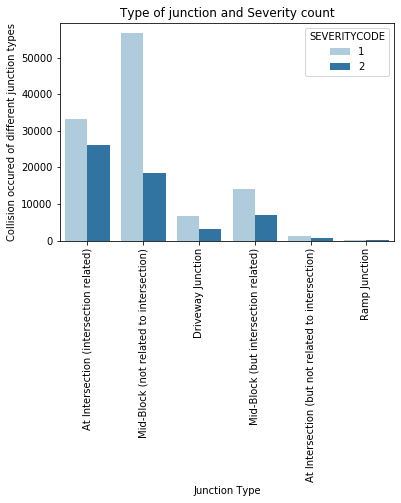

In [10]:
sns.countplot(x="JUNCTIONTYPE", hue="SEVERITYCODE", data=df, palette="Paired")

plt.title('Type of junction and Severity count')
plt.xlabel('Junction Type')
plt.xticks(rotation = 90)
plt.ylabel('Collision occured of different junction types')

***We can see that most Prop Damage accidents take place in Mid-Block (not related to intersection) while most accidents with injuries take place in At Intersection (intersection related)***

Text(0, 0.5, 'Collision occured of different weather types')

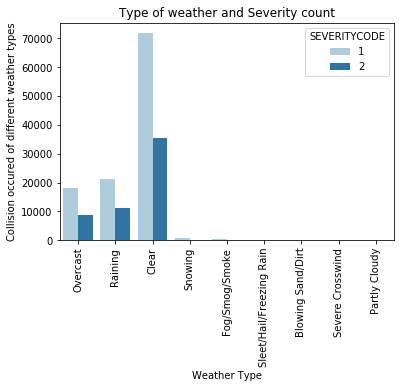

In [11]:
sns.countplot(x="WEATHER", hue="SEVERITYCODE", data=df, palette="Paired")

plt.title('Type of weather and Severity count')
plt.xlabel('Weather Type')
plt.xticks(rotation = 90)
plt.ylabel('Collision occured of different weather types')

***Most accidents take place with clear weather***

Text(0, 0.5, 'Collision occured of different road condition types')

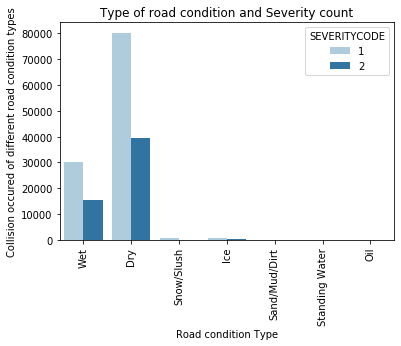

In [12]:
sns.countplot(x="ROADCOND", hue="SEVERITYCODE", data=df, palette="Paired")

plt.title('Type of road condition and Severity count')
plt.xlabel('Road condition Type')
plt.xticks(rotation = 90)
plt.ylabel('Collision occured of different road condition types')

***Most accidents take place in dry road conditions***

Text(0, 0.5, 'Collision occured of different light condition types')

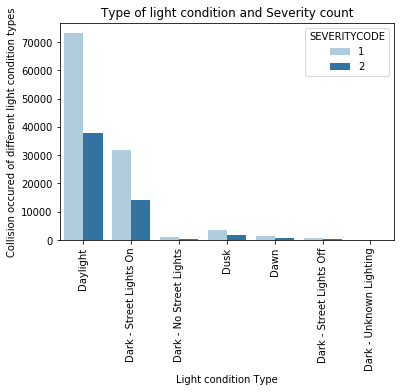

In [13]:
sns.countplot(x="LIGHTCOND", hue="SEVERITYCODE", data=df, palette="Paired")

plt.title('Type of light condition and Severity count')
plt.xlabel('Light condition Type')
plt.xticks(rotation = 90)
plt.ylabel('Collision occured of different light condition types')

***Most accidents take place in daylight***

Text(0, 0.5, 'Collision occured of different number of involved vehicles')

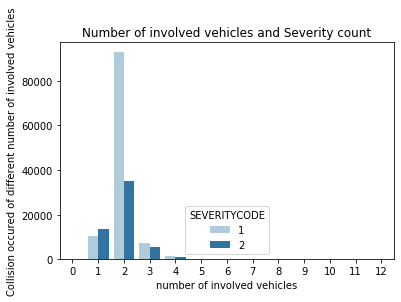

In [14]:
sns.countplot(x="VEHCOUNT", hue="SEVERITYCODE", data=df, palette="Paired")

plt.title('Number of involved vehicles and Severity count')
plt.xlabel('number of involved vehicles')
plt.ylabel('Collision occured of different number of involved vehicles')

***In most accidents involved 2 vehicles***

### Data transformation

In [15]:
# splitting the column of junctiontype
df[pd.get_dummies(df['JUNCTIONTYPE']).columns] = pd.get_dummies(df['JUNCTIONTYPE'])
df.drop(['JUNCTIONTYPE'], axis=1, inplace=True)

# splitting the column of weather
df[pd.get_dummies(df['WEATHER']).columns] = pd.get_dummies(df['WEATHER'])
df.drop(['WEATHER'], axis=1, inplace=True)

# splitting the column of roadconditions
df[pd.get_dummies(df['ROADCOND']).columns] = pd.get_dummies(df['ROADCOND'])
df.drop(['ROADCOND'], axis=1, inplace=True)

# splitting the column of lightconditions
df[pd.get_dummies(df['LIGHTCOND']).columns] = pd.get_dummies(df['LIGHTCOND'])
df.drop(['LIGHTCOND'], axis=1, inplace=True)

df.head()

,VEHCOUNT,SEVERITYCODE,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction,Blowing Sand/Dirt,Clear,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,2,2,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,2,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,3,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,2,2,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


### Exploration of data

In [24]:
df.corr()

,VEHCOUNT,SEVERITYCODE,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction,Blowing Sand/Dirt,Clear,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
VEHCOUNT,1.000000,-0.078443,0.012027,-0.094993,-0.009298,0.040333,0.066365,0.000114,0.001415,0.016112,...,-0.004995,-0.016340,-0.016500,-0.012103,-0.005595,-0.036399,-0.007117,-0.015480,0.041825,-0.000594
SEVERITYCODE,-0.078443,1.000000,0.000832,0.174078,-0.008615,-0.000969,-0.162893,-0.000095,-0.001508,-0.001221,...,-0.021467,-0.002938,0.009543,-0.018417,-0.008369,-0.029580,0.000654,0.001832,0.031046,0.003525
At Intersection (but not related to intersection),0.012027,0.000832,1.000000,-0.077095,-0.026142,-0.039550,-0.093683,-0.003165,-0.001647,0.004476,...,0.001811,-0.000215,-0.003010,-0.001600,-0.001172,-0.006080,-0.000719,-0.003134,0.008330,-0.003405
At Intersection (intersection related),-0.094993,0.174078,-0.077095,1.000000,-0.186338,-0.281908,-0.667765,-0.022562,-0.003858,-0.012610,...,-0.020196,-0.008688,0.023743,-0.025311,-0.007330,-0.026003,0.002100,0.002724,0.028740,0.003029
Driveway Junction,-0.009298,-0.008615,-0.026142,-0.186338,1.000000,-0.095592,-0.226432,-0.007651,-0.002386,0.002394,...,-0.006486,-0.005182,-0.010916,-0.006872,-0.007722,-0.046886,-0.001737,-0.004909,0.046475,0.004433
Mid-Block (but intersection related),0.040333,-0.000969,-0.039550,-0.281908,-0.095592,1.000000,-0.342567,-0.011575,0.001922,-0.011331,...,0.002540,-0.002103,0.010475,-0.014425,-0.005646,-0.008239,-0.000028,-0.004365,0.012327,0.000627
Mid-Block (not related to intersection),0.066365,-0.162893,-0.093683,-0.667765,-0.226432,-0.342567,1.000000,-0.027417,0.003933,0.017918,...,0.020573,0.012317,-0.024369,0.037754,0.014589,0.054033,-0.001014,0.003196,-0.059634,-0.004793
Ramp Junction,0.000114,-0.000095,-0.003165,-0.022562,-0.007651,-0.011575,-0.027417,1.000000,-0.000482,-0.004586,...,-0.002140,-0.000751,0.005596,-0.002746,0.002434,0.000606,-0.000210,0.001337,-0.001151,0.000934
Blowing Sand/Dirt,0.001415,-0.001508,-0.001647,-0.003858,-0.002386,0.001922,0.003933,-0.000482,1.000000,-0.021120,...,0.020444,-0.000391,-0.003778,0.002785,-0.001280,0.002070,-0.000109,0.001293,-0.003069,0.001274
Clear,0.016112,-0.001221,0.004476,-0.012610,0.002394,-0.011331,0.017918,-0.004586,-0.021120,1.000000,...,-0.077945,-0.029894,-0.719124,-0.014925,-0.020319,-0.124193,-0.003817,-0.054662,0.147816,-0.027701


***we see that there is not significant correlation between features***

### Building Models

In [17]:
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [34]:
# setting up for training and train/test split

df_model = df
X = df_model.drop(['SEVERITYCODE'],axis=1)
y = df_model['SEVERITYCODE']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.8,test_size=0.2)

print("done")

done


In [35]:
# Looking at the Logistic Regression

lr = LogisticRegression()
lr.fit(X_train,y_train)
yhat_lr=lr.predict(X_test)

print("done")

done


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [36]:
# looking into Support Vector Machine

clf = svm.SVC(kernel = "linear")
clf.fit(X_train, y_train)
yhat_svm = clf.predict(X_test)
print("done")

done


In [39]:
# looking at the Decision Tree

dt = DecisionTreeClassifier(criterion = "entropy", max_depth=10)
dt.fit(X_train, y_train)
yhat_dt = dt.predict(X_test)

print("done")

done


In [37]:
# looking into Random Forest Classifier

m = RandomForestClassifier(n_estimators=100, criterion="entropy")
m.fit(X_train, y_train)
yhat_rfc = m.predict(X_test)

print("done")

done


### Evaluation of models

In [40]:
from sklearn.metrics import f1_score, precision_score, recall_score
f1lr = f1_score(y_test, yhat_lr)
f1dt = f1_score(y_test, yhat_dt)
f1rf = f1_score(y_test, yhat_rfc)
f1svm = f1_score(y_test, yhat_svm)


acclr = accuracy_score(y_test, yhat_lr)
accdt = accuracy_score(y_test, yhat_dt)
accrf = accuracy_score(y_test, yhat_rfc)
accsvm = accuracy_score(y_test, yhat_svm)


plr = precision_score(y_test, yhat_lr)
pdt = precision_score(y_test, yhat_dt)
prf = precision_score(y_test, yhat_rfc)
psvm = precision_score(y_test, yhat_svm)

rlr = recall_score(y_test, yhat_lr)
rdt = recall_score(y_test, yhat_dt)
rrf = recall_score(y_test, yhat_rfc)
rsvm = recall_score(y_test, yhat_svm)


results = [['Model', 'Accuracy score', 'F1 score', 'Precision','Recall'],['Logistic Regression', acclr, f1lr, plr, rlr],['Decision Tree',accdt, f1dt,pdt,rdt],['Random Forest',accrf,f1rf,prf,rrf],['Support Vector Machine', accsvm, f1svm, psvm, rsvm]]
results = pd.DataFrame(results)       
print(results)

                        0               1         2          3         4
0                   Model  Accuracy score  F1 score  Precision    Recall
1     Logistic Regression        0.698522  0.815985   0.694297  0.989394
2           Decision Tree        0.708404  0.812444     0.7184  0.934818
3           Random Forest        0.707956  0.812195   0.718064   0.93473
4  Support Vector Machine        0.675593  0.806393   0.675593         1


***The best method to predict the severity of an accident is probably the Decision Tree method***